# ST590 - Project 2

Authored by Group 13 - Dave Bergeron, Xavier Genelin, and Maksim Nikiforov

## Part 3

In [1]:
# Required on Windows OS
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

import pandas as pd
import numpy as np
import pyspark.pandas as ps 
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [2]:
# Read in our .csv file using pandas-on-Spark
NFL_scores = ps.read_csv("scoresFull.csv")

# Show the first set of rows
NFL_scores.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,AOT2,AFinal,homeTeam,HQ1,HQ2,HQ3,HQ4,HOT,HOT2,HFinal,stadium,startTime,toss,roof,surface,duration,attendance,weather,vegasLine,OU,AfirstDowns,AnetPassYds,AtotalYds,Aturnovers,AtotalPlays,HfirstDowns,HnetPassYds,HtotalYds,Hturnovers,HtotalPlays,OUvalue,OUresult,awayRushAtt,awayRushYds,awayRushTD,awayPassComp,awayPassAtt,awayPassYds,awayPassTD,awayPassInt,awayTimesSacked,awaySackYdsLost,awayFum,awayFumLost,awayNumPen,awayPenYds,away3rdConv,away3rdAtt,away4thConv,away4thAtt,awayTOP,homeRushAtt,homeRushYds,homeRushTD,homePassComp,homePassAtt,homePassYds,homePassTD,homePassInt,homeTimesSacked,homeSackYdsLost,homeFum,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,-1,16,New York Giants,3,3,0,7,-1,-1,13,Giants Stadium,8:38pm,Giants,outdoors,grass,170,"78,748","73 degrees relative humidity 49%, wind 7 mph",San Francisco 49ers -4.0,39.0 (under),13,166,279,1,51,21,318,361,3,70,39.0,(under),25,113,0,16,26,166,1,1,0,0,0,0,5,29,2,6,0,0,27.53,22,43,1,28,45,342,0,3,3,24,0,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,-1,23,Chicago Bears,7,3,3,14,-1,-1,27,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay,201,"63,226","85 degrees relative humidity 0%, wind 3 mph",Chicago Bears -4.5,41.0 (over),19,228,368,3,62,20,288,368,2,60,41.0,(over),33,140,1,16,28,234,1,2,1,6,2,1,8,52,3,8,0,0,31.52,26,80,1,20,33,297,2,1,1,9,1,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,-1,26,Tampa Bay Buccaneers,0,3,7,10,0,-1,20,Raymond James Stadium,4:15pm,Buccaneers,outdoors,grass,221,"65,554","90 degrees relative humidity 57%, wind 6 mph",Tampa Bay Buccaneers -6.0,37.5 (over),21,250,368,1,78,19,261,333,1,77,37.5,(over),34,118,0,24,42,260,2,1,2,10,0,0,5,45,6,11,0,0,40.68,21,72,0,28,53,278,2,1,3,17,1,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,-1,37,Buffalo Bills,3,14,7,7,0,-1,31,Ralph Wilson Stadium,1:04pm,Bills,outdoors,astroturf,205,"72,751","86 degrees relative humidity 75%, wind 6 mph",New York Jets -3.0,43.0 (over),18,193,266,1,47,26,242,384,3,75,43.0,(over),14,73,0,24,30,210,2,0,3,17,1,1,10,90,2,4,0,0,21.10,32,142,3,26,39,271,1,2,4,29,1,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,-1,23,Washington Redskins,3,7,14,7,-1,-1,31,FedExField,1:05pm,Redskins,outdoors,grass,184,"85,140","76 degrees relative humidity 71%, wind 5 mph",Washington Redskins -6.0,44.5 (over),14,187,257,1,57,21,320,442,1,73,44.5,(over),20,70,1,14,36,187,1,1,1,0,1,0,1,5,3,7,0,0,25.60,32,122,1,28,40,327,3,1,1,7,0,0,7,56,6,10,1,2,34.40,8,6.0


We have NFL data from the 2002-2014 seasons for each game. We first want to examine the mean and standard deviation values for each quarter of the game and the final score for both teams in the dataset.

In [13]:
# Use pandas-on-Spark to find the mean and standard deviation for the AQ1, AQ2,
# AQ3, AQ4, AFinal, HQ1, HQ2, HQ3, HQ4, and HFinal variables
NFL_scores[["AQ1", "AQ2", "AQ3", "AQ4", "AFinal", "HQ1", "HQ2", "HQ3", "HQ4", "HFinal"]].agg(["mean", "std"])

,AQ1,AQ2,AQ3,AQ4,AFinal,HQ1,HQ2,HQ3,HQ4,HFinal
std,4.490700,5.221593,4.632717,5.278775,10.195586,4.726903,5.702788,4.755145,5.417310,10.405952
mean,3.924806,6.241429,4.386920,5.890233,20.557188,4.828868,7.105157,4.791126,6.322962,23.174013


From the table above, we can see that the final scores for the home team was higher than the away team on average. The standard deviation for both final scores is different by a small amount, with more variation in the home team's final score. It also follows that each quarter of the game, the home team had higher average scores than the away team. Both follow a similar pattern of scoring more points in the second and fourth quarters of the game. We'll expand upon this further by looking at the same values but look at them by season.

In [17]:
# Repeat the above process but do so for each value of the season variable
NFL_scores[["AQ1", "AQ2", "AQ3", "AQ4", "AFinal", "HQ1", "HQ2", \
            "HQ3", "HQ4", "HFinal", "season"]].groupby("season").agg(["mean", "std"])

AQ1                 AQ2                 AQ3                 AQ4               AFinal                  HQ1                 HQ2                 HQ3                 HQ4               HFinal           
            mean       std      mean       std      mean       std      mean       std       mean        std      mean       std      mean       std      mean       std      mean       std       mean        std
season                                                                                                                                                                                                            
2003    3.558052  4.320719  6.093633  5.440954  3.913858  4.396264  5.355805  5.148618  19.112360  10.211049  5.026217  4.681919  6.625468  5.367875  4.561798  4.719871  6.295880  5.321832  22.677903  10.105887
2007    3.696629  4.324448  6.220974  5.050111  4.337079  4.507997  5.872659  5.283565  20.228464  10.572177  5.026217  4.824287  7.074906  5.780607  4.913858  4.455721  6.018727  6.010300  23.157303  10.500518
2006    3.629213  3.986015  6.179775  5.157435  4.303371  4.531605  6.063670  5.539984  20.254682  10.269065  4.606742  4.999138  6.041199  5.199966  4.565543  4.931715  5.932584  5.262574  21.258427   9.876525
2013    4.044944  4.345709  6.670412  5.441761  5.011236  4.904719  6.183521  5.417879  21.977528   9.680199  5.112360  4.791373  7.445693  5.726854  5.258427  4.846194  6.932584  5.757240  24.891386  10.582623
2014    4.284644  4.893746  6.322097  4.769223  4.734082  5.059837  5.876404  5.243299  21.295880   9.780606  4.913858  4.821248  7.164794  6.113817  5.397004  5.184534  6.374532  5.329217  23.973783  10.870879
2004    3.913858  4.556669  6.265918  5.094638  4.153558  4.631822  5.797753  5.400181  20.239700  10.162710  4.943820  4.733562  7.071161  5.587193  4.250936  4.675238  6.561798  5.155379  22.906367  10.441145
2012    4.468165  4.754293  6.273408  5.452819  4.509363  4.627771  6.235955  5.338234  21.655431  10.367006  4.928839  4.504654  7.003745  5.379925  5.217228  4.542779  6.823970  5.675672  24.119850  10.559919
2009    3.868914  4.748728  6.202247  5.285488  4.299625  4.714412  5.943820  5.571192  20.382022  10.743600  4.737828  4.731771  7.790262  6.208245  4.228464  4.723587  5.887640  5.176810  22.779026  10.788110
2005    3.887640  4.522554  5.543071  4.947945  4.029963  4.476236  5.191011  4.753811  18.786517   9.926578  4.393258  4.586556  7.426966  5.704940  4.677903  4.489042  5.737828  5.173548  22.314607   9.772905
2010    3.973783  4.727466  6.865169  5.396722  4.629213  4.784959  5.704120  4.953022  21.318352  10.278809  4.576779  4.485221  6.771536  5.476904  4.868914  4.753476  6.681648  5.626849  23.000000  10.230060
2011    3.857678  4.455541  5.981273  5.281869  4.584270  4.628635  5.996255  5.120722  20.509363   9.647690  5.022472  4.859633  7.333333  5.673886  5.033708  4.962527  6.479401  5.262521  23.981273  10.527962
2008    3.801498  4.203686  6.498127  5.337747  4.074906  4.242863  6.423221  5.498864  20.842697  10.279806  5.179775  4.857120  7.205993  5.825685  4.595506  4.700950  6.044944  5.171299  23.183521  10.414349
2002    4.037453  4.470297  6.022472  5.167810  4.449438  4.639673  5.928839  5.282133  20.640449  10.296996  4.307116  4.549980  7.411985  5.923282  4.715356  4.716938  6.426966  5.384231  23.018727  10.295065

In [4]:
# get the values that we're interested in and get the mean of each by season
season_data = NFL_scores[["AQ1", "AQ2", "AQ3", "AQ4", "HQ1", \
                         "HQ2", "HQ3", "HQ4", "season"]].groupby("season").mean()

# add the season as a column in the dataset
season_data["season"] = season_data.index

season_data = season_data.sort_values("season")

# remove the season index that was created by the groupping
season_data = season_data.reset_index(drop = True) 

season_data

,AQ1,AQ2,AQ3,AQ4,HQ1,HQ2,HQ3,HQ4,season
0,4.037453,6.022472,4.449438,5.928839,4.307116,7.411985,4.715356,6.426966,2002
1,3.558052,6.093633,3.913858,5.355805,5.026217,6.625468,4.561798,6.295880,2003
2,3.913858,6.265918,4.153558,5.797753,4.943820,7.071161,4.250936,6.561798,2004
3,3.887640,5.543071,4.029963,5.191011,4.393258,7.426966,4.677903,5.737828,2005
4,3.629213,6.179775,4.303371,6.063670,4.606742,6.041199,4.565543,5.932584,2006
5,3.696629,6.220974,4.337079,5.872659,5.026217,7.074906,4.913858,6.018727,2007
6,3.801498,6.498127,4.074906,6.423221,5.179775,7.205993,4.595506,6.044944,2008
7,3.868914,6.202247,4.299625,5.943820,4.737828,7.790262,4.228464,5.887640,2009
8,3.973783,6.865169,4.629213,5.704120,4.576779,6.771536,4.868914,6.681648,2010
9,3.857678,5.981273,4.584270,5.996255,5.022472,7.333333,5.033708,6.479401,2011


In [15]:
type(season_data)

pyspark.pandas.frame.DataFrame

c:\users\genel\appdata\local\programs\python\python39\lib\site-packages\pyspark\pandas\indexes\base.py:589: UserWarning: We recommend using `Int64Index.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))
c:\users\genel\appdata\local\programs\python\python39\lib\site-packages\pyspark\pandas\generic.py:638: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))


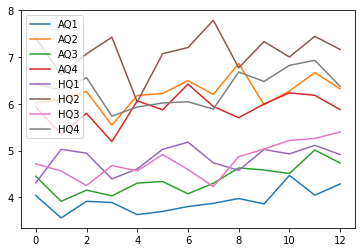

In [10]:
plt.plot(season_data['AQ1'], label = 'AQ1')
plt.plot(season_data['AQ2'], label = 'AQ2')
plt.plot(season_data['AQ3'], label = 'AQ3')
plt.plot(season_data['AQ4'], label = 'AQ4')
plt.plot(season_data['HQ1'], label = 'HQ1')
plt.plot(season_data['HQ2'], label = 'HQ2')
plt.plot(season_data['HQ3'], label = 'HQ3')
plt.plot(season_data['HQ4'], label = 'HQ4')
plt.legend()
plt.show()